## Healthcare project - Persistency of a drug

### Import libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
import datetime
import calendar
from datetime import date, timedelta
warnings.filterwarnings("ignore")
import calendar

### Load the dataset

In [74]:
health_df = pd.read_excel('Healthcare_dataset.xlsx',sheet_name='Dataset')
health_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [75]:
health_df.shape

(3424, 69)

In [76]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

##### There are only 2 numeric columns and remaining are categorical

### Check for null values

In [77]:
health_df.isnull().sum().sum()

0

In [78]:
health_df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

### Check for duplicate values

In [79]:
health_df.duplicated().sum()

0

##### There are no null values in the dataset and no need of handling missing values.
##### There are no duplicated data in this dataset.

### Understanding the data

#### Target Analysis before transformation

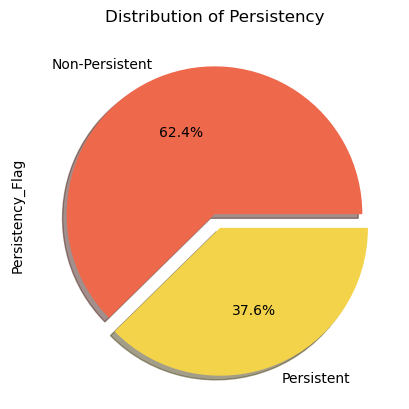

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

colors = ['#ee684b','#f3d34a']

#plot the pie chart to understand the percentage of Persistent and Non-Persistent
health_df.Persistency_Flag.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, 
                                                   colors=colors).set(title='Distribution of Persistency')
plt.show()

##### There are 37.6% of patients are persistent in taking prescription drugs while 62.4% are non persistent.

### Understanding correlation between variables

<Axes: >

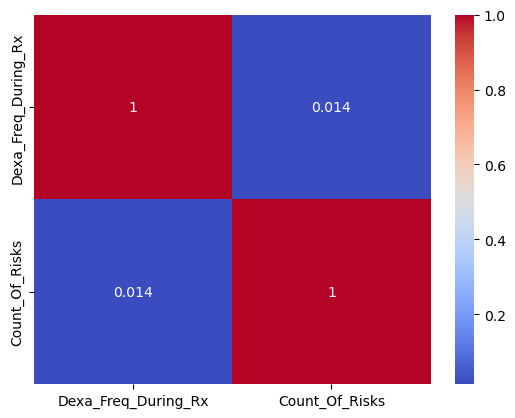

In [81]:
sns.heatmap(health_df.corr(), cmap="coolwarm", annot=True)

#### There are only 2 numeric values Number of DEXA scans taken during Rx and count of risks

### Outlier Analysis

#### Now lets do Outlier analysis for 2 numeric columns Dexa_Freq_During_Rx and Count_Of_Risks

Text(0, 0.5, 'Dexa_Freq_During_Rx')

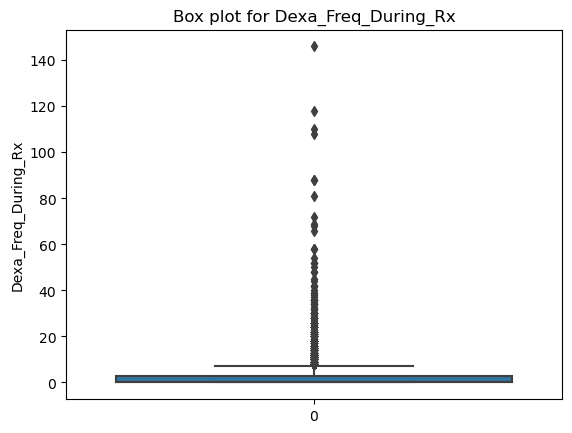

In [82]:
ax=sns.boxplot(health_df['Dexa_Freq_During_Rx'])
ax.set_title('Box plot for Dexa_Freq_During_Rx')
ax.set_ylabel('Dexa_Freq_During_Rx')

#### There are many outliers for Dexa_Freq_During_Rx. So, we can now check to see skewness using Histogram

<Axes: xlabel='Dexa_Freq_During_Rx', ylabel='Count'>

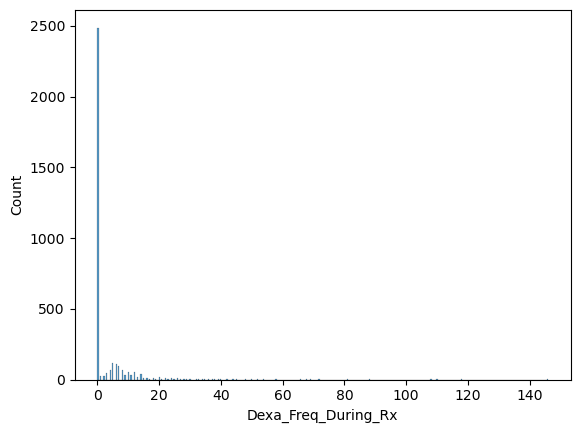

In [83]:
sns.histplot(health_df, x='Dexa_Freq_During_Rx')

#### We can clearly see that it is not normal distribution and it is right skewed data.

In [84]:
health_df.shape

(3424, 69)

### Identifying outliers using IQR and removing them.

In [85]:
Q1 = health_df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = health_df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(health_df['Dexa_Freq_During_Rx']>=upper)[0]
lower_array = np.where(health_df['Dexa_Freq_During_Rx']<=lower)[0]
 
# Removing the outliers
health_df.drop(index=upper_array, inplace=True)
health_df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", health_df.shape)

New Shape:  (2964, 69)


#### There are 460 outliers for Dexa_Freq_During_Rx and they are removed based on IQR.

Text(0, 0.5, 'Count_Of_Risks')

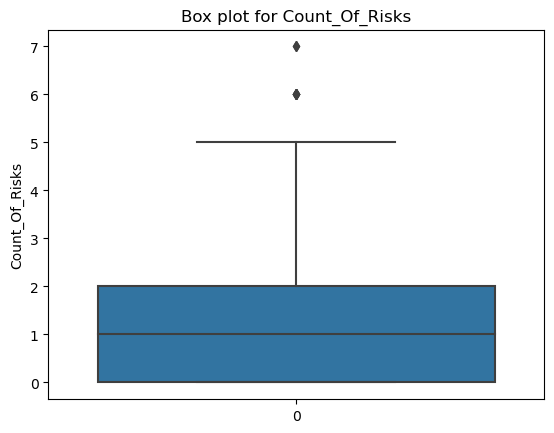

In [86]:
ax=sns.boxplot(health_df['Count_Of_Risks'])
ax.set_title('Box plot for Count_Of_Risks')
ax.set_ylabel('Count_Of_Risks')

#### We can clearly see there are only 2 outliers for Count of risks and the records with the values 6 and 7 are outliers.

<Axes: xlabel='Count_Of_Risks', ylabel='Count'>

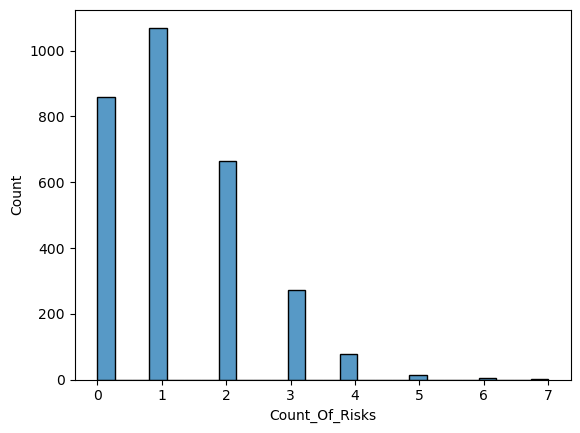

In [87]:
sns.histplot(health_df, x='Count_Of_Risks')

### Remove these outliers with values 6 and 7

In [88]:
health_df.Count_Of_Risks.unique()

array([0, 2, 1, 3, 4, 5, 6, 7], dtype=int64)

In [89]:
health_df = health_df[(health_df['Count_Of_Risks'] != 6) & (health_df['Count_Of_Risks'] != 7)]
health_df.shape

(2956, 69)

#### There are 8 outliers for count of risks with values 5,6,7 and which are removed.

### Skewness after removing outliers

<Axes: xlabel='Dexa_Freq_During_Rx', ylabel='Count'>

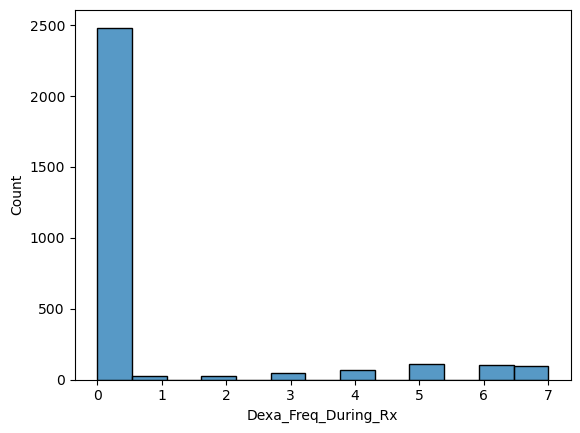

In [90]:
sns.histplot(health_df, x='Dexa_Freq_During_Rx')

In [91]:
health_df['Dexa_Freq_During_Rx'].value_counts()

0    2483
5     113
6     106
7      93
4      68
3      46
2      24
1      23
Name: Dexa_Freq_During_Rx, dtype: int64

#### They are higher number of records with 0 values, so Dexa_Freq_During_Rx is highly skewed and removing 2483 is not valid. So skewness for Dexa_Freq_During_Rx cannot be reduced. Applying different transformations will also not work for this column.

#### The skewness is high for Dexa_Freq_During_Rx

<Axes: xlabel='Count_Of_Risks', ylabel='Count'>

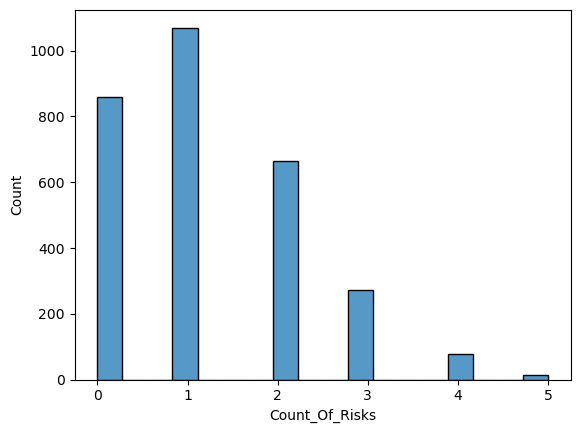

In [92]:
sns.histplot(health_df, x='Count_Of_Risks')

In [93]:
health_df['Count_Of_Risks'].value_counts()

1    1070
0     858
2     664
3     271
4      79
5      14
Name: Count_Of_Risks, dtype: int64

#### Count of risks skewness is reduced. But removing more data values will have data loss and may result in bias in results. So, we are leaving the remaining values.

In [94]:
#Identify highly correlated features
import warnings
warnings.filterwarnings("ignore")
#Create correlation matrix
cor_matrix = health_df.corr().abs()
#Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#Find index of feature columns with correlation greater than 0.7
corr_features= [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print('The highly correlated features are:',corr_features)

The highly correlated features are: []


##### There are no highly correlated features so not dropping any columns.

In [95]:
df_cols = health_df.columns[(health_df.dtypes == 'object') & (health_df.columns!= 'Persistency_Flag')]
df_cols

Index(['Ptid', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket',
       'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditi

### Data Transformation

##### Ptid is patient id and categorical.but is not important to understand factors effecting persistency of a drug. 
##### This field cannot be used for model building as it is not numeric. Dropping this feature.

In [96]:
health_df.drop(['Ptid'],axis=1,inplace=True)

In [97]:
health_df.shape

(2956, 68)

In [98]:
health_df['Gender'].value_counts()

Female    2782
Male       174
Name: Gender, dtype: int64

In [99]:
health_df['Race'].value_counts()

Caucasian           2715
African American      92
Other/Unknown         80
Asian                 69
Name: Race, dtype: int64

In [100]:
health_df['Ethnicity'].value_counts()

Not Hispanic    2797
Hispanic          82
Unknown           77
Name: Ethnicity, dtype: int64

In [101]:
health_df['Region'].value_counts()

Midwest          1212
South            1116
West              384
Northeast         195
Other/Unknown      49
Name: Region, dtype: int64

In [102]:
health_df['Age_Bucket'].value_counts()

>75      1264
65-75     921
55-65     624
<55       147
Name: Age_Bucket, dtype: int64

In [103]:
health_df['Idn_Indicator'].value_counts()

Y    2212
N     744
Name: Idn_Indicator, dtype: int64

In [104]:
health_df['Ntm_Speciality'].value_counts()

GENERAL PRACTITIONER                                              1350
RHEUMATOLOGY                                                       510
ENDOCRINOLOGY                                                      367
Unknown                                                            284
ONCOLOGY                                                           187
OBSTETRICS AND GYNECOLOGY                                           80
UROLOGY                                                             30
ORTHOPEDIC SURGERY                                                  26
CARDIOLOGY                                                          21
OTOLARYNGOLOGY                                                      13
PATHOLOGY                                                           13
HEMATOLOGY & ONCOLOGY                                               12
PHYSICAL MEDICINE AND REHABILITATION                                11
PEDIATRICS                                                           9
SURGER

In [105]:
health_df['Ntm_Specialist_Flag'].value_counts()

Others        1781
Specialist    1175
Name: Ntm_Specialist_Flag, dtype: int64

In [106]:
health_df['Ntm_Speciality_Bucket'].value_counts()

OB/GYN/Others/PCP/Unknown    1862
Endo/Onc/Uro                  584
Rheum                         510
Name: Ntm_Speciality_Bucket, dtype: int64

In [107]:
health_df['Tscore_Bucket_Prior_Ntm'].value_counts()

>-2.5     1695
<=-2.5    1261
Name: Tscore_Bucket_Prior_Ntm, dtype: int64

In [108]:
health_df['Change_T_Score'].value_counts()

No change    1397
Unknown      1365
Worsened      134
Improved       60
Name: Change_T_Score, dtype: int64

In [109]:
health_df['Risk_Segment_Prior_Ntm'].value_counts()

VLR_LR    1682
HR_VHR    1274
Name: Risk_Segment_Prior_Ntm, dtype: int64

In [110]:
health_df['Change_Risk_Segment'].value_counts()

Unknown      1977
No change     869
Worsened       95
Improved       15
Name: Change_Risk_Segment, dtype: int64

In [111]:
health_df['Risk_Segment_During_Rx'].value_counts()

Unknown    1365
VLR_LR      802
HR_VHR      789
Name: Risk_Segment_During_Rx, dtype: int64

In [112]:
health_df['Dexa_During_Rx'].value_counts()

N    2483
Y     473
Name: Dexa_During_Rx, dtype: int64

In [113]:
health_df['Frag_Frac_Prior_Ntm'].value_counts()

N    2505
Y     451
Name: Frag_Frac_Prior_Ntm, dtype: int64

In [114]:
health_df['Frag_Frac_During_Rx'].value_counts()

N    2623
Y     333
Name: Frag_Frac_During_Rx, dtype: int64

In [115]:
health_df['Gluco_Record_Prior_Ntm'].value_counts()

N    2251
Y     705
Name: Gluco_Record_Prior_Ntm, dtype: int64

In [116]:
health_df['Gluco_Record_During_Rx'].value_counts()

N    2216
Y     740
Name: Gluco_Record_During_Rx, dtype: int64

In [117]:
health_df['Injectable_Experience_During_Rx'].value_counts()

Y    2629
N     327
Name: Injectable_Experience_During_Rx, dtype: int64

In [118]:
health_df['Adherent_Flag'].value_counts()

Adherent        2821
Non-Adherent     135
Name: Adherent_Flag, dtype: int64

In [119]:
health_df['Comorb_Vitamin_D_Deficiency'].value_counts()

N    2059
Y     897
Name: Comorb_Vitamin_D_Deficiency, dtype: int64

In [120]:
health_df['Concom_Narcotics'].value_counts()

N    1941
Y    1015
Name: Concom_Narcotics, dtype: int64

In [121]:
health_df['Risk_Type_1_Insulin_Dependent_Diabetes'].value_counts()

N    2832
Y     124
Name: Risk_Type_1_Insulin_Dependent_Diabetes, dtype: int64

##### We can see that most of them 'Y' or 'N' features or have binary values. 
##### 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Speciality_Bucket', 
##### 'Change_T_Score', 'Change_Risk_Segment', 'Risk_Segment_During_Rx' have multiple values.

### Mapping Categorical Features

In [122]:
map_cat={'N':0, 'Y':1}
health_df=health_df.replace(map_cat)

In [123]:
df_cols = health_df.columns[(health_df.dtypes == 'object') & (health_df.columns!= 'Persistency_Flag')]
df_cols

Index(['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm',
       'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Change_Risk_Segment', 'Adherent_Flag'],
      dtype='object')

In [124]:
health_df['Gender'].value_counts()

Female    2782
Male       174
Name: Gender, dtype: int64

##### Females are high, so lets map Female as 0 and Male as 1

In [125]:
map_g = {'Female':0, 
            'Male':1,
          }
health_df['Gender'] = health_df['Gender'].replace(map_g)
health_df['Gender']=health_df['Gender'].astype(int)

In [126]:
health_df['Ntm_Specialist_Flag'].value_counts()

Others        1781
Specialist    1175
Name: Ntm_Specialist_Flag, dtype: int64

In [127]:
map_s = {'Others':0, 
            'Specialist':1,
          }
health_df['Ntm_Specialist_Flag'] = health_df['Ntm_Specialist_Flag'].replace(map_s)
health_df['Ntm_Specialist_Flag']=health_df['Ntm_Specialist_Flag'].astype(int)

In [128]:
health_df['Adherent_Flag'].value_counts()

Adherent        2821
Non-Adherent     135
Name: Adherent_Flag, dtype: int64

In [129]:
map_a = {'Non-Adherent':0, 
            'Adherent':1,
          }
health_df['Adherent_Flag'] = health_df['Adherent_Flag'].replace(map_a)
health_df['Adherent_Flag']=health_df['Adherent_Flag'].astype(int)

### One Hot encoding

In [130]:
df_cols = health_df.columns[(health_df.dtypes == 'object') & (health_df.columns!= 'Persistency_Flag')]
df_cols

Index(['Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'],
      dtype='object')

In [131]:
#One hot encoding on multiple categorical columns using get_dummies()
cols=pd.get_dummies(health_df,columns=['Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'],
                    prefix=['Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'])
health_df[cols.columns]=cols
health_df.drop(['Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'],axis=1,inplace=True)

In [132]:
df_cols = health_df.columns[(health_df.dtypes == 'object') & (health_df.columns!= 'Persistency_Flag')]
df_cols

Index([], dtype='object')

#### Convert Persistency_Flag to numeric

In [133]:
health_df['Persistency_Flag'].value_counts()

Non-Persistent    2053
Persistent         903
Name: Persistency_Flag, dtype: int64

In [134]:
map_p = {'Non-Persistent':0, 
            'Persistent':1,
          }
health_df['Persistency_Flag'] = health_df['Persistency_Flag'].replace(map_p)
health_df['Persistency_Flag']=health_df['Persistency_Flag'].astype(int)

In [135]:
df_cols = health_df.columns[(health_df.dtypes == 'object')]
df_cols

Index([], dtype='object')

### Target Analysis after transformation

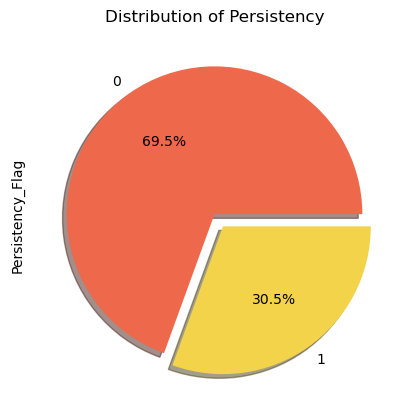

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

colors = ['#ee684b','#f3d34a']

#plot the pie chart to understand the percentage of Persistent and Non-Persistent
health_df.Persistency_Flag.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, 
                                                   colors=colors).set(title='Distribution of Persistency')
plt.show()

##### Now all features are converted to numeric values for model building

### Standardization and Train/Test Split

In [137]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X=health_df.drop('Persistency_Flag',axis=1)
Y=health_df['Persistency_Flag']
#split into train and test datasets.
X_train_org,X_test_org,Y_train,Y_test=train_test_split(X,Y,train_size=0.70, random_state=0)
#normalize dataset using MinMaxScaler()
scaler=MinMaxScaler()
#apply the scale to fit and transform test and train sets
X_train=pd.DataFrame(scaler.fit_transform(X_train_org),columns=X_train_org.columns)
X_test=pd.DataFrame(scaler.transform(X_test_org),columns=X_test_org.columns)